In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix, classification_report


import tensorflow as tf

import keras
from keras.models import Sequential
from keras.utils import to_categorical
from keras.utils import plot_model
from keras.optimizers import Adam
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization, ZeroPadding2D, Add, ReLU
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping

In [2]:
train_data = pd.read_csv('fashion-mnist_train.csv')
test_data = pd.read_csv('fashion-mnist_test.csv')

train_data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
print('train data shape : {}'.format(train_data.shape))
print('test data shape : {}'.format(test_data.shape))

train data shape : (60000, 785)
test data shape : (10000, 785)


In [4]:
train_data = np.array(train_data, dtype= 'float32')
test_data = np.array(test_data, dtype= 'float32')

### Slicing the labels and Normalizing the pixel data.

In [5]:
X_train_orig = train_data[:, 1:]/ 255
y_train_orig = train_data[:, 0]

X_test = test_data[:, 1:]/ 255
Y_test = test_data[:, 0]

### creating validation set.

In [6]:
X_train, X_validate, y_train, y_validate = train_test_split(X_train_orig, y_train_orig, test_size = 0.2, random_state=42)

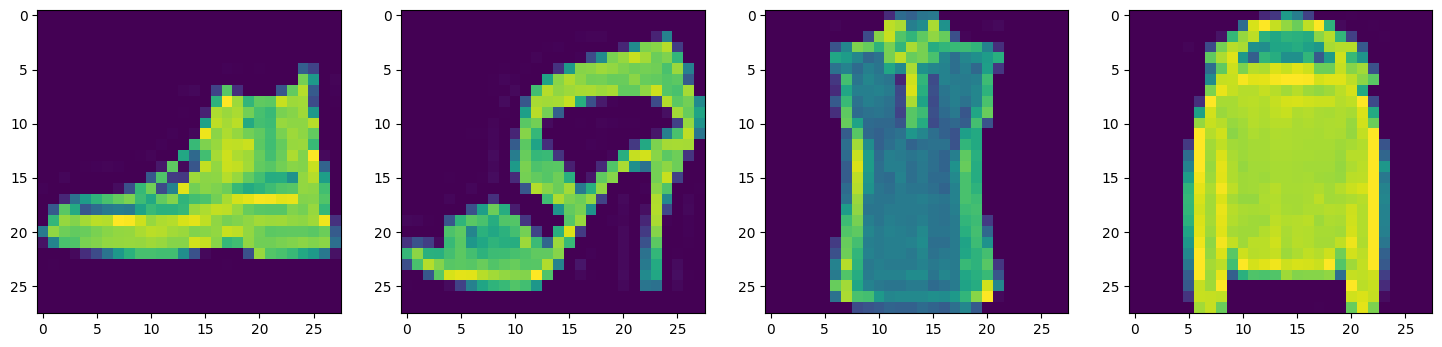

In [7]:
# Lets check some images
plt.figure(figsize = (18,6))

plt.subplot(141)
image = X_train[49].reshape(28, 28)
plt.imshow(image)

plt.subplot(142)
image = X_train[3].reshape(28, 28)
plt.imshow(image)

plt.subplot(143)
image = X_train[6].reshape(28, 28)
plt.imshow(image)

plt.subplot(144)
image = X_train[8].reshape(28, 28)
plt.imshow(image)
plt.show()

# Neural Network - 2-Layers

In [8]:
n_cols = X_train.shape[1]
model = Sequential()

model.add(Dense(512, activation='relu', input_shape=(n_cols,)))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 468874 (1.79 MB)
Trainable params: 468874 (1.79 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
model.compile(optimizer=Adam(lr = 0.0001),
              loss='sparse_categorical_crossentropy', 
              metrics = ['accuracy'])

In [11]:
history = model.fit(X_train, y_train,
                    batch_size=300,
                    epochs = 20,
                    verbose=1,
                    validation_data=(X_validate, y_validate))

Epoch 1/20



160/160 [==============================] - 2s 8ms/step - loss: 0.5883 - accuracy: 0.7933 - val_loss: 0.4378 - val_accuracy: 0.8396
Epoch 2/20
160/160 [==============================] - 1s 6ms/step - loss: 0.3974 - accuracy: 0.8577 - val_loss: 0.3946 - val_accuracy: 0.8597
Epoch 3/20
160/160 [==============================] - 1s 6ms/step - loss: 0.3494 - accuracy: 0.8753 - val_loss: 0.3435 - val_accuracy: 0.8734
Epoch 4/20
160/160 [==============================] - 1s 6ms/step - loss: 0.3224 - accuracy: 0.8826 - val_loss: 0.3468 - val_accuracy: 0.8742
Epoch 5/20
160/160 [==============================] - 1s 6ms/step - loss: 0.3006 - accuracy: 0.8911 - val_loss: 0.3339 - val_accuracy: 0.8782
Epoch 6/20
160/160 [==============================] - 1s 6ms/step - loss: 0.2850 - accuracy: 0.8958 - val_loss: 0.3165 - val_accuracy: 0.8821
Epoch 7/20
160/160 [==============================] - 1s 6ms/step - loss: 0.2669 - accuracy: 0.9025 - val_loss: 0.3061 - val_accuracy: 0.8879
Epoch 8/20
160/16

In [12]:
model.save('model/model.h5')
model = keras.models.load_model('model/model.h5')

c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [13]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1]*100)

Test loss: 0.31130921840667725
Test accuracy: 89.71999883651733


# CNN - 1 Convolution layer

In [14]:
image_rows = 28
image_cols = 28
input_shape = (image_rows, image_cols, 1)

X_train = X_train.reshape(X_train.shape[0], image_rows, image_cols, 1)
X_test = X_test.reshape(X_test.shape[0], image_rows, image_cols, 1)
X_validate = X_validate.reshape(X_validate.shape[0], image_rows, image_cols, 1)

print('x_train shape: {}'.format(X_train.shape))
print('x_test shape: {}'.format(X_test.shape))
print('x_validate shape: {}'.format(X_validate.shape))

x_train shape: (48000, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)
x_validate shape: (12000, 28, 28, 1)


In [15]:
# One-hot encoding
y_train = to_categorical(y_train, 10)
y_validate = to_categorical(y_validate, 10)
y_test = to_categorical(Y_test, 10)

In [28]:
cnn_model = Sequential()

cnn_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Dropout(0.25))
cnn_model.add(Flatten()) 
cnn_model.add(Dense(256, activation='relu'))
cnn_model.add(Dropout(0.5))
cnn_model.add(Dense(10, activation='softmax'))

In [36]:
early_stopping_monitor = EarlyStopping(patience=5, monitor='val_loss', mode='min', verbose=1)

cnn_model.compile(optimizer=Adam(lr=0.0001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'], )

In [37]:
cnn_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 13, 13, 64)        0         
 g2D)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 13, 13, 64)        0         
                                                                 
 flatten_1 (Flatten)         (None, 10816)             0         
                                                                 
 dense_5 (Dense)             (None, 256)               2769152   
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                      

In [38]:
history = cnn_model.fit(X_train, y_train,
          batch_size=300,
          epochs=50,
          verbose=1,
          validation_data=(X_validate, y_validate),
          callbacks=early_stopping_monitor)
cnn_model.save('model/cnn_model_1.h5')

Epoch 1/50
160/160 [==============================] - 15s 77ms/step - loss: 0.1676 - accuracy: 0.9375 - val_loss: 0.2303 - val_accuracy: 0.9188
Epoch 2/50
160/160 [==============================] - 12s 72ms/step - loss: 0.1577 - accuracy: 0.9417 - val_loss: 0.2212 - val_accuracy: 0.9237
Epoch 3/50
160/160 [==============================] - 12s 74ms/step - loss: 0.1527 - accuracy: 0.9435 - val_loss: 0.2265 - val_accuracy: 0.9247
Epoch 4/50
160/160 [==============================] - 12s 74ms/step - loss: 0.1451 - accuracy: 0.9466 - val_loss: 0.2218 - val_accuracy: 0.9252
Epoch 5/50
160/160 [==============================] - 12s 76ms/step - loss: 0.1422 - accuracy: 0.9471 - val_loss: 0.2270 - val_accuracy: 0.9242
Epoch 6/50
160/160 [==============================] - 12s 75ms/step - loss: 0.1368 - accuracy: 0.9500 - val_loss: 0.2331 - val_accuracy: 0.9256
Epoch 7/50
160/160 [==============================] - 13s 79ms/step - loss: 0.1329 - accuracy: 0.9511 - val_loss: 0.2314 - val_accuracy:

In [17]:
cnn_model = keras.models.load_model('model/cnn_model_1.h5')
score = cnn_model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1]*100)

Test loss: 0.2160155326128006
Test accuracy: 92.30999946594238


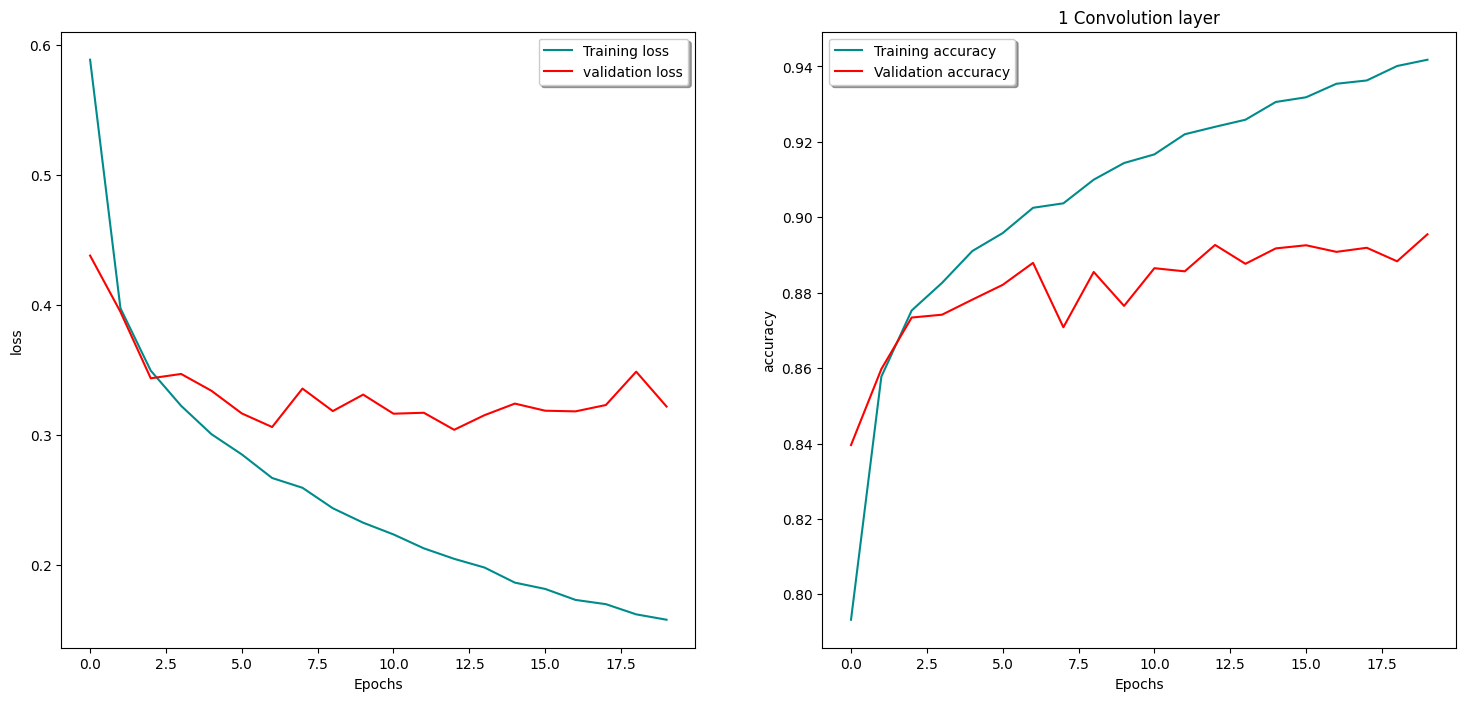

In [19]:
plt.figure(figsize = (18,8))
plt.subplot(121)
plt.plot(history.history['loss'], color='darkcyan', label="Training loss")
plt.plot(history.history['val_loss'], color='r', label="validation loss",)
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend(loc='best', shadow=True)
plt.subplot(122)
plt.plot(history.history['accuracy'], color='darkcyan', label="Training accuracy")
plt.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend(loc='best', shadow=True)
plt.title('1 Convolution layer')
plt.show()

# CNN - 2 Convolution layers

In [48]:
from keras.layers import Input, Conv2D, BatchNormalization, Activation, Add, MaxPooling2D, Flatten, Dense, Dropout
from keras.models import Model

def residual_block(input_tensor, filters):
    x = Conv2D(filters, kernel_size=(3, 3), activation='relu', padding='same')(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Conv2D(filters, kernel_size=(3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = Add()([x, input_tensor])
    x = Activation('relu')(x)
    return x

input_shape = (28, 28, 1)
inputs = Input(shape=input_shape)

x = Conv2D(64, kernel_size=(3, 3), activation='relu')(inputs)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.25)(x)
x = residual_block(x, filters=64)

x = Conv2D(128, kernel_size=(3, 3), activation='relu')(x)
x = residual_block(x, filters=128)
x = Dropout(0.25)(x)
x = Dropout(0.3)(x)

x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
outputs = Dense(10, activation='softmax')(x)

# Create the model
cnn_model_2 = Model(inputs=inputs, outputs=outputs)

cnn_model_2.summary()
cnn_model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience = 3)
history_2 = cnn_model_2.fit(X_train, y_train,
          batch_size= 300,
          epochs=50,
          verbose=1,
          validation_data=(X_validate, y_validate),
          callbacks=[early_stopping_monitor])
cnn_model_2.save('model/cnn_model_2.h5')

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_15 (InputLayer)       [(None, 28, 28, 1)]          0         []                            
                                                                                                  
 conv2d_57 (Conv2D)          (None, 26, 26, 64)           640       ['input_15[0][0]']            
                                                                                                  
 max_pooling2d_9 (MaxPoolin  (None, 13, 13, 64)           0         ['conv2d_57[0][0]']           
 g2D)                                                                                             
                                                                                                  
 dropout_15 (Dropout)        (None, 13, 13, 64)           0         ['max_pooling2d_9[0][0]'

c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [50]:
cnn_model_2 = keras.models.load_model('model/cnn_model_2.h5')
score = cnn_model_2.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1]*100)

Test loss: 0.21676965057849884
Test accuracy: 92.57000088691711


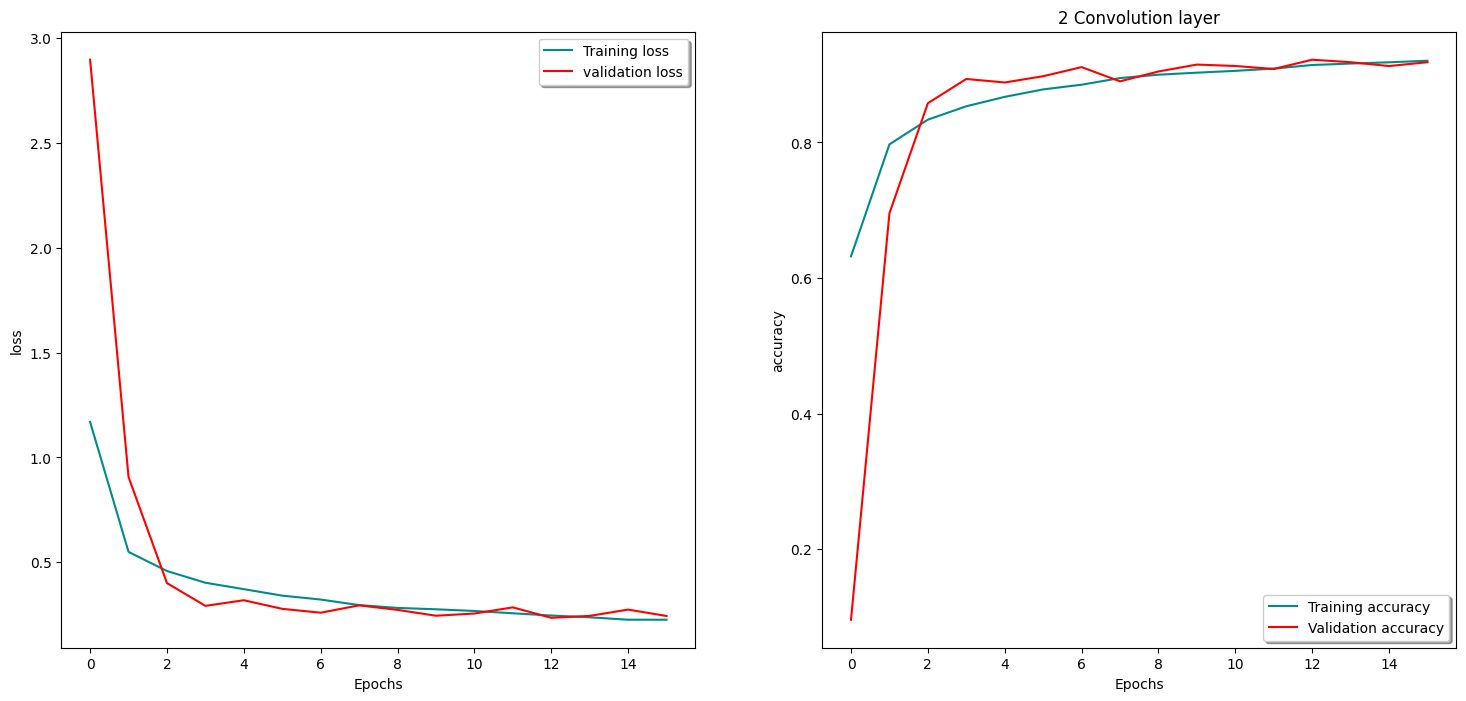

In [53]:
plt.figure(figsize = (18,8))
plt.subplot(121)
plt.plot(history_2.history['loss'], color='darkcyan', label="Training loss")
plt.plot(history_2.history['val_loss'], color='r', label="validation loss",)
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend(loc='best', shadow=True)
plt.subplot(122)
plt.plot(history_2.history['accuracy'], color='darkcyan', label="Training accuracy")
plt.plot(history_2.history['val_accuracy'], color='r',label="Validation accuracy")
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend(loc='best', shadow=True)
plt.title('2 Convolution layer')
plt.show()

# CNN - 3 Convolution Layers

In [28]:
cnn_model_3 = Sequential()

cnn_model_3.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
cnn_model_3.add(MaxPooling2D(pool_size=(2, 2)))

cnn_model_3.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
cnn_model_3.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
cnn_model_3.add(Dropout(0.3))
cnn_model_3.add(Flatten()) 

cnn_model_3.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
cnn_model_3.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
cnn_model_3.add(Dense(10, activation='softmax'))

In [29]:
cnn_model_3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 9, 9, 128)         73856     
_________________________________________________________________
dropout_5 (Dropout)          (None, 9, 9, 128)         0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 10368)             0         
_________________________________________________________________
dense_8 (Dense)              (None, 256)               2654464   
__________

In [30]:
cnn_model_3.compile(optimizer= Adam(lr= 0.0001),
          loss='categorical_crossentropy',
          metrics=['accuracy'])

In [31]:
history_3 = cnn_model_3.fit(X_train, y_train,
                            batch_size=300,
                            epochs=50,
                            verbose=1,
                            validation_data=(X_validate, y_validate),
                            callbacks=[early_stopping_monitor])

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 7s 139us/step - loss: 0.9304 - acc: 0.6748 - val_loss: 0.5682 - val_acc: 0.7826
Epoch 2/50
48000/48000 [==============================] - 6s 128us/step - loss: 0.5289 - acc: 0.8046 - val_loss: 0.4866 - val_acc: 0.8194
Epoch 3/50
48000/48000 [==============================] - 6s 128us/step - loss: 0.4589 - acc: 0.8364 - val_loss: 0.4223 - val_acc: 0.8514
Epoch 4/50
48000/48000 [==============================] - 6s 128us/step - loss: 0.4161 - acc: 0.8524 - val_loss: 0.4065 - val_acc: 0.8548
Epoch 5/50
48000/48000 [==============================] - 6s 128us/step - loss: 0.3876 - acc: 0.8615 - val_loss: 0.3848 - val_acc: 0.8602
Epoch 6/50
48000/48000 [==============================] - 6s 128us/step - loss: 0.3663 - acc: 0.8686 - val_loss: 0.3503 - val_acc: 0.8740
Epoch 7/50
48000/48000 [==============================] - 6s 128us/step - loss: 0.3482 - acc: 0.8747 - val_loss: 0.3458 - 

In [32]:
score = cnn_model_3.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1]*100)

Test loss: 0.21519795525074006
Test accuracy: 92.21000000000001


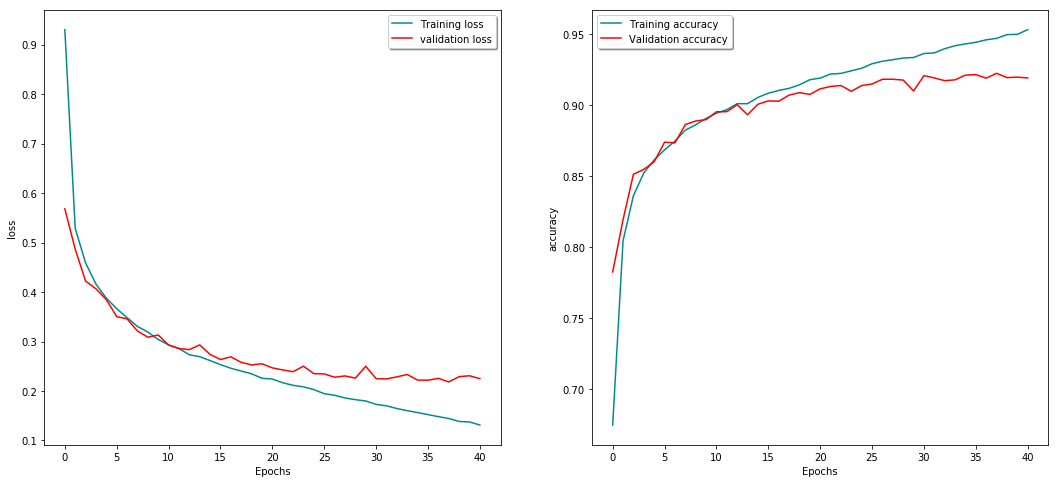

In [33]:
plt.figure(figsize = (18,8))
plt.subplot(121)
plt.plot(history_3.history['loss'], color='darkcyan', label="Training loss")
plt.plot(history_3.history['val_loss'], color='r', label="validation loss",)
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend(loc='best', shadow=True)
plt.subplot(122)
plt.plot(history_3.history['acc'], color='darkcyan', label="Training accuracy")
plt.plot(history_3.history['val_acc'], color='r',label="Validation accuracy")
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend(loc='best', shadow=True)
plt.title('3 Convolution layer')
plt.show()

# CNN - 4 Convolution Layers with padding.

In [34]:
cnn_model_4 = Sequential()

cnn_model_4.add(Conv2D(32, 3, padding='same', activation='relu', input_shape=input_shape))
cnn_model_4.add(Conv2D(64, 3, padding='same', activation='relu'))
cnn_model_4.add(MaxPooling2D(2))

cnn_model_4.add(Conv2D(128, 3, padding='same', activation ='relu'))
cnn_model_4.add(Conv2D(256, 3, padding='same', activation ='relu'))
cnn_model_4.add(MaxPooling2D(2, 2))
cnn_model_4.add(Dropout(0.3))

cnn_model_4.add(Flatten())
cnn_model_4.add(Dense(256, activation='relu'))
cnn_model_4.add(Dropout(0.5))
cnn_model_4.add(Dense(10, activation='softmax'))

In [35]:
cnn_model_4.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 14, 14, 256)       295168    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 256)         0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 7, 7, 256)         0         
__________

In [36]:
cnn_model_4.compile(optimizer=Adam(lr = 0.0001),
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

In [37]:
history_4 = cnn_model_4.fit(X_train, y_train,
                            validation_data=(X_validate, y_validate),
                            epochs=50, 
                            batch_size=300)

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 19s 400us/step - loss: 0.9076 - acc: 0.6806 - val_loss: 0.5110 - val_acc: 0.8085
Epoch 2/50
48000/48000 [==============================] - 18s 378us/step - loss: 0.5167 - acc: 0.8132 - val_loss: 0.4087 - val_acc: 0.8547
Epoch 3/50
48000/48000 [==============================] - 18s 378us/step - loss: 0.4381 - acc: 0.8446 - val_loss: 0.3744 - val_acc: 0.8642
Epoch 4/50
48000/48000 [==============================] - 18s 379us/step - loss: 0.3979 - acc: 0.8576 - val_loss: 0.3372 - val_acc: 0.8788
Epoch 5/50
48000/48000 [==============================] - 18s 379us/step - loss: 0.3660 - acc: 0.8685 - val_loss: 0.3323 - val_acc: 0.8787
Epoch 6/50
48000/48000 [==============================] - 18s 379us/step - loss: 0.3459 - acc: 0.8757 - val_loss: 0.3063 - val_acc: 0.8894
Epoch 7/50
48000/48000 [==============================] - 18s 379us/step - loss: 0.3312 - acc: 0.8817 - val_loss: 0.

In [38]:
score = cnn_model_4.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1]*100)

Test loss: 0.19266336570531128
Test accuracy: 93.45


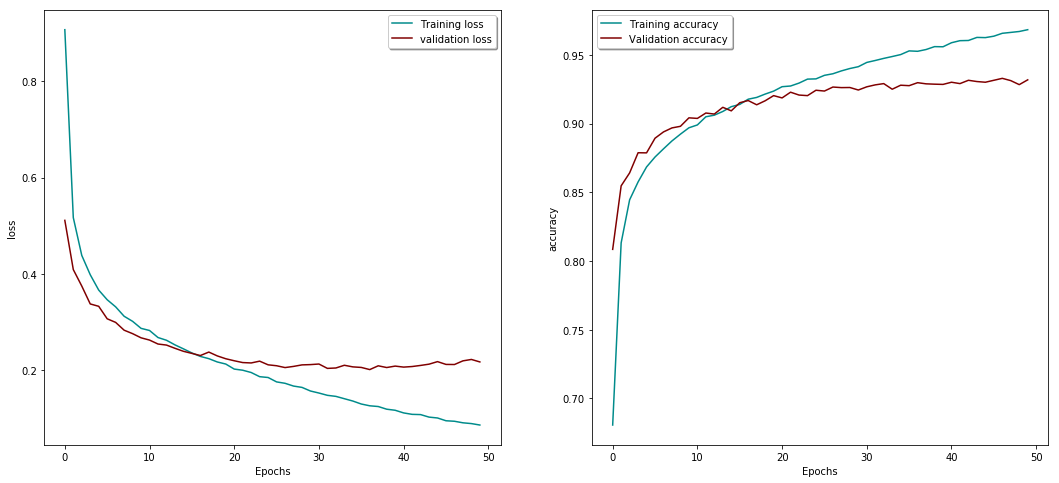

In [39]:
plt.figure(figsize = (18,8))
plt.subplot(121)
plt.plot(history_4.history['loss'], color='darkcyan', label="Training loss")
plt.plot(history_4.history['val_loss'], color='maroon', label="validation loss",)
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend(loc='best', shadow=True)
plt.subplot(122)
plt.plot(history_4.history['acc'], color='darkcyan', label="Training accuracy")
plt.plot(history_4.history['val_acc'], color='maroon',label="Validation accuracy")
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend(loc='best', shadow=True)
plt.title('4 Convolution layer')
plt.show()

# CNN - 5 Convolution Layers with padding.

In [40]:
cnn_model_5 = Sequential()

cnn_model_5.add(Conv2D(32, 3, padding='same', activation='relu', input_shape=(28,28,1)))
cnn_model_5.add(Conv2D(64, 3, padding='same', activation='relu'))
cnn_model_5.add(MaxPooling2D(2))

cnn_model_5.add(Conv2D(128, 3, padding='same', activation ='relu'))
cnn_model_5.add(Conv2D(256, 3, padding='same', activation ='relu'))
cnn_model_5.add(MaxPooling2D(2, 2))
cnn_model_5.add(Dropout(0.3))

cnn_model_5.add(Flatten())
cnn_model_5.add(Dense(256, activation='relu'))
cnn_model_5.add(Dropout(0.5))
cnn_model_5.add(Dense(512, activation='relu'))
cnn_model_5.add(Dropout(0.5))
cnn_model_5.add(Dense(1024, activation='relu'))
cnn_model_5.add(Dropout(0.5))
cnn_model_5.add(Dense(10, activation='softmax'))

In [41]:
cnn_model_5.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 14, 14, 256)       295168    
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 7, 7, 256)         0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 7, 7, 256)         0         
__________

In [42]:
cnn_model_5.compile(optimizer=Adam(lr = 0.0001),
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

In [43]:
history_5 = cnn_model_5.fit(X_train, y_train,
                    validation_data=(X_validate, y_validate),
                    epochs=50, 
                    batch_size=300)

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 19s 405us/step - loss: 1.2771 - acc: 0.5096 - val_loss: 0.6087 - val_acc: 0.7689
Epoch 2/50
48000/48000 [==============================] - 19s 391us/step - loss: 0.6574 - acc: 0.7524 - val_loss: 0.4857 - val_acc: 0.8166
Epoch 3/50
48000/48000 [==============================] - 19s 391us/step - loss: 0.5510 - acc: 0.7966 - val_loss: 0.4394 - val_acc: 0.8382
Epoch 4/50
48000/48000 [==============================] - 19s 391us/step - loss: 0.4884 - acc: 0.8233 - val_loss: 0.3859 - val_acc: 0.8605
Epoch 5/50
48000/48000 [==============================] - 19s 392us/step - loss: 0.4430 - acc: 0.8421 - val_loss: 0.3540 - val_acc: 0.8691
Epoch 6/50
48000/48000 [==============================] - 19s 392us/step - loss: 0.4072 - acc: 0.8569 - val_loss: 0.3381 - val_acc: 0.8748
Epoch 7/50
48000/48000 [==============================] - 19s 391us/step - loss: 0.3831 - acc: 0.8648 - val_loss: 0.

In [44]:
score = cnn_model_5.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1]*100)

Test loss: 0.20969056709222494
Test accuracy: 93.85


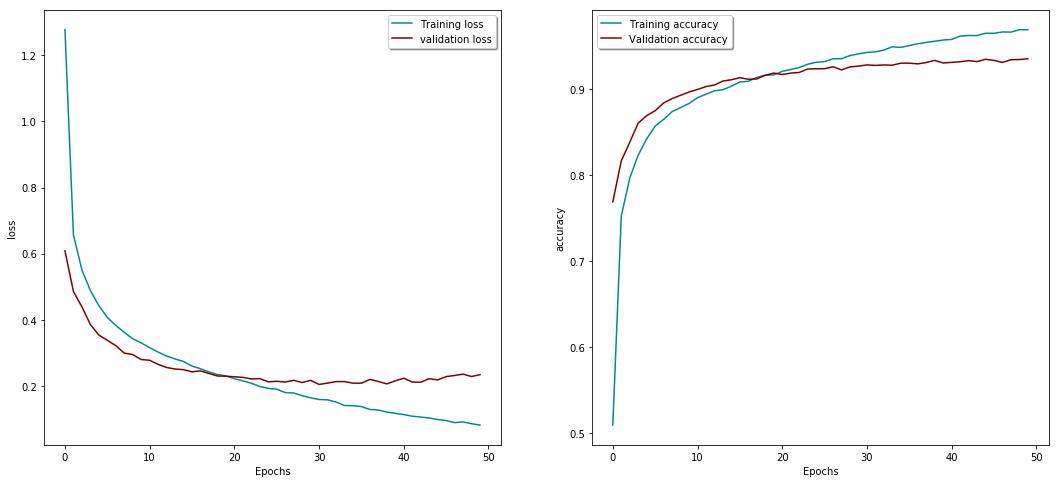

In [45]:
plt.figure(figsize = (18,8))
plt.subplot(121)
plt.plot(history_5.history['loss'], color='darkcyan', label="Training loss")
plt.plot(history_5.history['val_loss'], color='maroon', label="validation loss",)
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend(loc='best', shadow=True)
plt.subplot(122)
plt.plot(history_5.history['acc'], color='darkcyan', label="Training accuracy")
plt.plot(history_5.history['val_acc'], color='maroon',label="Validation accuracy")
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend(loc='best', shadow=True)
plt.show()

# Image Augmentation

In [46]:
imgen = ImageDataGenerator(rotation_range=10,
                           width_shift_range=0.1,
                           height_shift_range=0.1,
                           shear_range=0.15,
                           zoom_range=0.1,
                           horizontal_flip=True,
                           vertical_flip=False)

In [47]:
history_6 = cnn_model_5.fit_generator(imgen.flow(X_train, y_train, batch_size = 300),
                                        steps_per_epoch = 48000//150,
                                        epochs=70,
                                        validation_data = imgen.flow(X_validate, y_validate,
                                                                    batch_size = 300),
                                        validation_steps=12000//150,
                                        use_multiprocessing = True)

Epoch 1/70
320/320 [==============================] - 40s 124ms/step - loss: 0.5141 - acc: 0.8217 - val_loss: 0.3633 - val_acc: 0.8638
Epoch 2/70
320/320 [==============================] - 40s 123ms/step - loss: 0.3873 - acc: 0.8616 - val_loss: 0.3226 - val_acc: 0.8815
Epoch 3/70
320/320 [==============================] - 40s 124ms/step - loss: 0.3579 - acc: 0.8718 - val_loss: 0.3063 - val_acc: 0.8880
Epoch 4/70
320/320 [==============================] - 40s 124ms/step - loss: 0.3378 - acc: 0.8791 - val_loss: 0.2914 - val_acc: 0.8950
Epoch 5/70
320/320 [==============================] - 40s 124ms/step - loss: 0.3240 - acc: 0.8849 - val_loss: 0.2862 - val_acc: 0.8955
Epoch 6/70
320/320 [==============================] - 40s 124ms/step - loss: 0.3148 - acc: 0.8870 - val_loss: 0.2784 - val_acc: 0.8990
Epoch 7/70
320/320 [==============================] - 40s 124ms/step - loss: 0.3031 - acc: 0.8911 - val_loss: 0.2704 - val_acc: 0.9007
Epoch 8/70
320/320 [==============================] - 4

In [48]:
score = cnn_model_5.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1] * 100)

Test loss: 0.17151972761452197
Test accuracy: 94.14


# Batch Normalization

In [49]:
cnn_all = Sequential()

cnn_all.add(Conv2D(32, 3, padding='same', activation='relu', input_shape=(28,28,1)))
BatchNormalization()

cnn_all.add(Conv2D(64, 3, padding='same', activation='relu'))
cnn_all.add(MaxPooling2D(2))
BatchNormalization()


cnn_all.add(Conv2D(128, 3, padding='same', activation ='relu'))
BatchNormalization()

cnn_all.add(Conv2D(256, 3, padding='same', activation ='relu'))
cnn_all.add(MaxPooling2D(2, 2))
cnn_all.add(Dropout(0.3))
BatchNormalization()

cnn_all.add(Flatten())

cnn_all.add(Dense(256, activation='relu'))
cnn_all.add(Dropout(0.5))
BatchNormalization()

cnn_all.add(Dense(512, activation='relu'))
cnn_all.add(Dropout(0.5))
BatchNormalization()

cnn_model_5.add(Dense(1024, activation='relu'))
cnn_model_5.add(Dropout(0.5))
BatchNormalization()

cnn_all.add(Dense(10, activation='softmax'))

In [50]:
cnn_all.compile(optimizer=Adam(lr = 0.0001),
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

In [51]:
history_all = cnn_all.fit(X_train, y_train,
                    validation_data=(X_validate, y_validate),
                    epochs=50, 
                    batch_size=300)

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 19s 393us/step - loss: 1.1438 - acc: 0.5806 - val_loss: 0.5596 - val_acc: 0.7858
Epoch 2/50
48000/48000 [==============================] - 18s 381us/step - loss: 0.6169 - acc: 0.7731 - val_loss: 0.4658 - val_acc: 0.8324
Epoch 3/50
48000/48000 [==============================] - 18s 381us/step - loss: 0.5269 - acc: 0.8097 - val_loss: 0.4102 - val_acc: 0.8533
Epoch 4/50
48000/48000 [==============================] - 18s 381us/step - loss: 0.4703 - acc: 0.8310 - val_loss: 0.3782 - val_acc: 0.8623
Epoch 5/50
48000/48000 [==============================] - 18s 382us/step - loss: 0.4285 - acc: 0.8460 - val_loss: 0.3551 - val_acc: 0.8696
Epoch 6/50
48000/48000 [==============================] - 18s 381us/step - loss: 0.3981 - acc: 0.8586 - val_loss: 0.3364 - val_acc: 0.8787
Epoch 7/50
48000/48000 [==============================] - 18s 381us/step - loss: 0.3742 - acc: 0.8662 - val_loss: 0.

In [52]:
y_pred = cnn_all.predict_classes(X_test, verbose=0)
score = cnn_all.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1]*100)

Test loss: 0.204320695027709
Test accuracy: 93.37


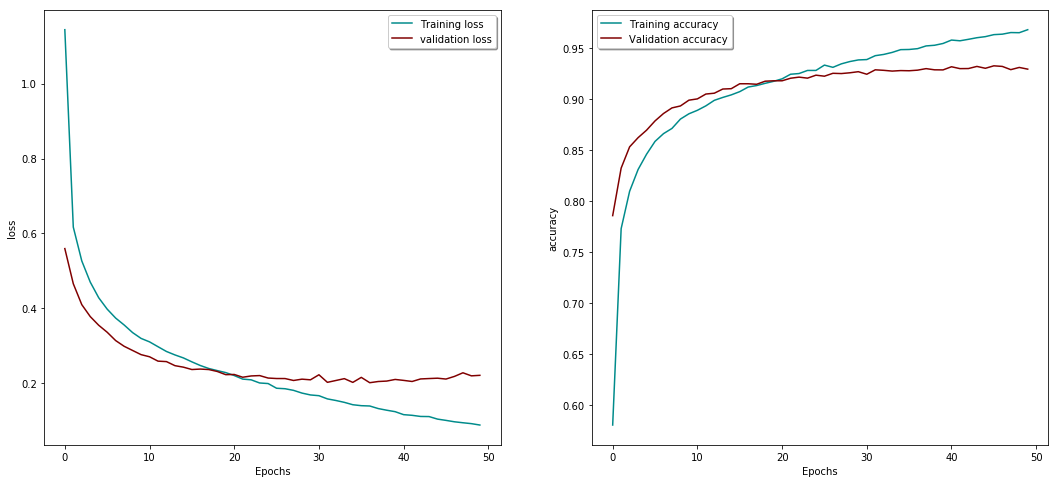

In [53]:
plt.figure(figsize = (18,8))
plt.subplot(121)
plt.plot(history_all.history['loss'], color='darkcyan', label="Training loss")
plt.plot(history_all.history['val_loss'], color='maroon', label="validation loss",)
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend(loc='best', shadow=True)
plt.subplot(122)
plt.plot(history_all.history['acc'], color='darkcyan', label="Training accuracy")
plt.plot(history_all.history['val_acc'], color='maroon',label="Validation accuracy")
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend(loc='best', shadow=True)
plt.show()

# Confusion Matrix.

In [54]:
classes = {0: 'T-shirt/top', 
           1: 'Trouser', 
           2: 'Pullover', 
           3: 'Dress', 
           4: 'Coat',
           5: 'Sandal', 
           6: 'Shirt', 
           7: 'Sneaker', 
           8: 'Bag', 
           9: 'Ankle boot'}

class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat',
                       'Sandal','Shirt','Sneaker','Bag','Ankle boot']

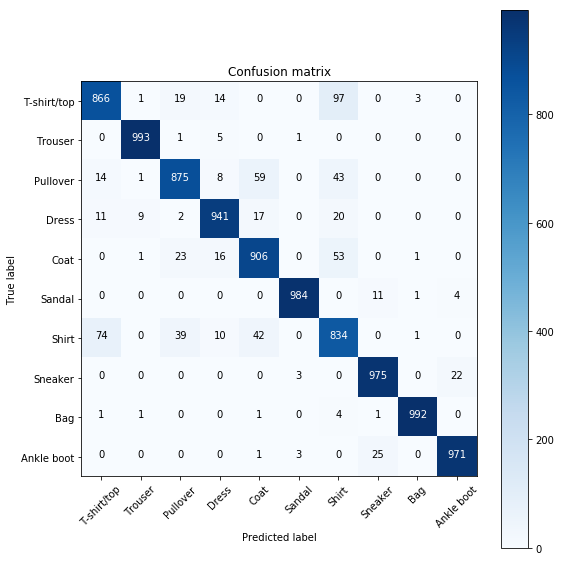

In [55]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.figure(figsize = (8,8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    
cnf_matrix = confusion_matrix(Y_test, y_pred)
plot_confusion_matrix(cnf_matrix, classes = class_names)

In [56]:
print(classification_report(Y_test, y_pred))

             precision    recall  f1-score   support

        0.0       0.90      0.87      0.88      1000
        1.0       0.99      0.99      0.99      1000
        2.0       0.91      0.88      0.89      1000
        3.0       0.95      0.94      0.94      1000
        4.0       0.88      0.91      0.89      1000
        5.0       0.99      0.98      0.99      1000
        6.0       0.79      0.83      0.81      1000
        7.0       0.96      0.97      0.97      1000
        8.0       0.99      0.99      0.99      1000
        9.0       0.97      0.97      0.97      1000

avg / total       0.93      0.93      0.93     10000

